In [47]:
using Plots
using Distributions
#using SpecialFunctions
#using KernelDensity
using Base
using LaTeXStrings
using JLD2
plot();

In [3]:
Exit(;a=-2,b=2,x=0,Δ=0.01)=begin
    x
    it=0

    while a<x<b
        it+=1
        x+=rand(Normal())*√Δ
    end
    return it*Δ, b<=x
end

Exit (generic function with 1 method)

In [4]:
temp(x;n=1e3,typ=1,a=0,b=1,Δ=0.01)=mean(Exit(a=a,b=b,x=x,Δ=Δ)[typ] for i in 1:n)

temp (generic function with 1 method)

In [6]:
X=0:0.01:1

0.0:0.01:1.0

In [9]:
Y=zeros(length(X));

In [ ]:
t=time()
wyn=Any[i for i in 1:length(Temp)]
for i in 0:3
    Threads.@threads for a in 1:Threads.nthreads()
        wyn[15*i+a]=["L=$L/T=$(Temp[15*i+a])",f_time(L=L, Times=Int(2.5*10^6),T=Temp[15*i+a])]
    end
end
for i in wyn
    file[i[1]] = i[2]
end
time()-t

In [35]:
n=1e5
Δ=1e-4

0.0001

In [36]:
t=time()
Threads.@threads for i in 1:101
    Y[i]=temp(X[i],n=n,Δ=Δ)
end
time()-t

21.28499984741211

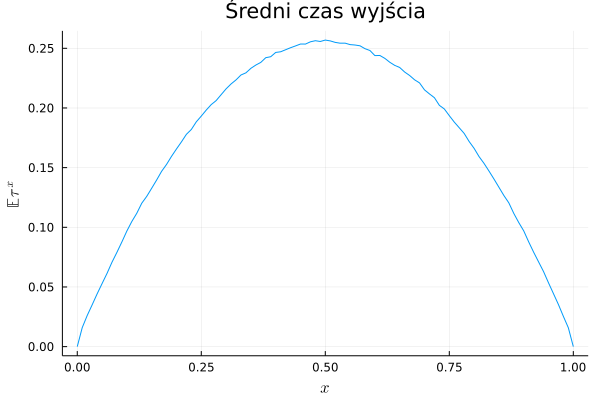

In [66]:
plot(X,Y, leg=false, ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")

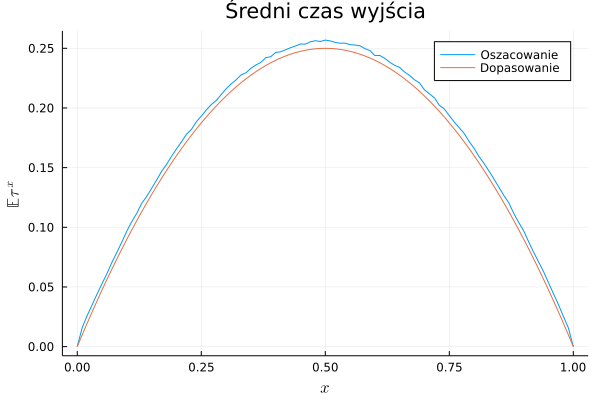

In [93]:
plot(X,Y, label="Oszacowanie", ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")
plot!(X,x->-x*(x-1), label="Dopasowanie")

In [80]:
savefig(plot!(dpi=200),"../fig/plot/exp_val.pdf")

# TEST

In [69]:
TEST=jldopen("test_plot.jld2","w")

JLDFile D:\GitHub\Symulacje\Sprawko_2\Zad 2\test_plot.jld2 (read/write)
  (no datasets)

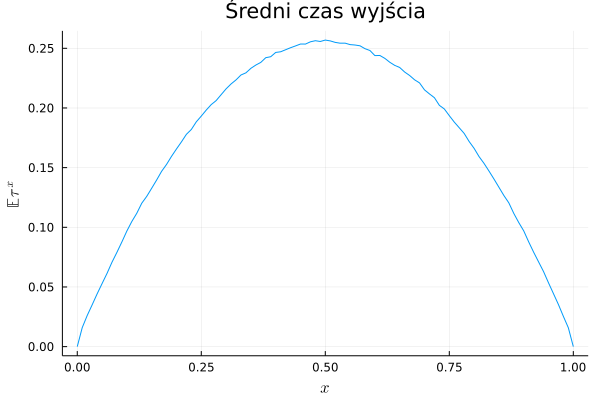

In [70]:
TEST["exp_val_plot"]=plot(X,Y, label="cos", leg=false, ylabel=L"$\mathbb{E}\tau^x$", xlabel=L"$x$", title="Średni czas wyjścia")

In [71]:
close(TEST)

In [72]:
TEST=jldopen("test_plot.jld2","r")

JLDFile D:\GitHub\Symulacje\Sprawko_2\Zad 2\test_plot.jld2 (read-only)
 └─🔢 exp_val_plot

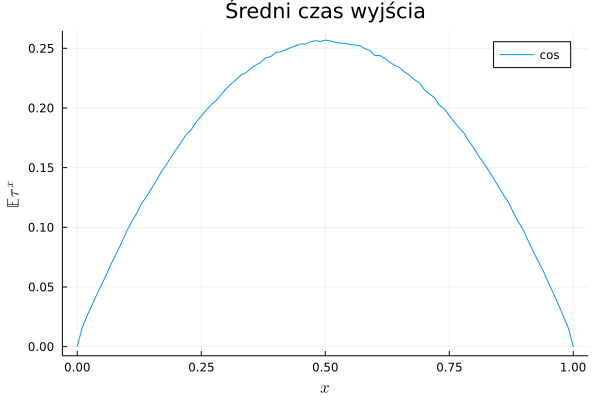

In [73]:
plot!(TEST["exp_val_plot"], leg=true)

In [74]:
close(TEST)